### PROJECT_ID   :  PTID-CDS-SEP-24-2088 
### PROJECT_TITLE:  PRCP-1000-PortugeseBank

# PORTUGUESE BANK-CLASSIFICATIONTYPE

# Nowadays, marketing expenditure in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

# Main Objective: increase the effectiveness of the bank's telemarketing campaign
# This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.


# Our goal is to predict whether a customer will subscribe to a term deposit based on their demographic and interaction data from the phone call campaigns.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("bank-additional-full.csv",sep=";")
data.head(pd.set_option("display.max_columns",None))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.shape

(41188, 21)

### The data contains 21 columns with 41,188 rows 

# DOMAIN ANALYSIS:


#### 1)AGE -age of the customer
#### 2)JOB- What kind of job that the customer is working on.
#### 3)MARITAL - Marital Status
#### 4)EDUCATION -Qualification of the customer.
#### 5)DEFAULT- It refers that the customer failed to repay the loans or credit card bills(YES).
#### 6)HOUSING- Whether the customer have housing loan or not.
#### 7)LOAN-Whether the customer have personal loan or not.
#### 8)CONTACT-How the customers have been conducted through cellular or telephone.
#### 9)MONTH-The month in which the customer is contacted.
#### 10)DAY_OF_WEEK-the specific day in which the customer is contacted.
#### 11)DURATION-duration of call in sec
#### 12)CAMPAIGN-It indicates the number of times a customer has been contacted during the current marketing campaign. Each value shows how many times                    the bank called or attempted to contact a customer.
#### 13)PDAYS-number of days that passed by after the client was last contacted from a previous campaign (999-client was not previously contacted)
#### 14)PREVIOUS-number of contacts performed before this campaign and for this client.
#### 15)POUTCOME-outcome of the previous campaign.
#### 16)EMP.VAR.RATE-employment variation rate(the percentage of employment rate between two quarters Q1 and Q3).
#### 17)CONS.PRICE.IDX-consumer price index - monthly indicator (calculate the average change in prices paid by consumers for a basket of goods and              services over time [Above 100 inflation and Below 100 deflation]).
#### 18)CONS.CONF.IDX-consumer confidence index (how the customer feels their economical conditions of present and future time).
#### 19)EURIBOR3M-euribor 3 month rate - daily indicator.
#### 20)NR.EMPLOYED-number of employees
#### 21)Y=output whether the customer has the client subscribed a term deposit or not.

In [5]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
for i in data.columns:
    print(i.upper())
    print(data[i].unique())
    print("\n")
    print("************************************")

AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


************************************
JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


************************************
MARITAL
['married' 'single' 'divorced' 'unknown']


************************************
EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


************************************
DEFAULT
['no' 'unknown' 'yes']


************************************
HOUSING
['no' 'yes' 'unknown']


************************************
LOAN
['no' 'yes' 'unknown']


************************************
CONTACT
['telephone' 'cellular']


******************************

In [7]:
for j in data.columns:
    print(j.upper())
    print(data[j].value_counts())
    print("\n")
    print("************************************")

AGE
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64


************************************
JOB
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


************************************
MARITAL
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


************************************
EDUCATION
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


************

In [8]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### There is no null values in the dataset 

## REPLACING THE "UNKNOWN" WORD:

In [9]:
for un in ["housing","loan","marital"]:
   print(data[un].value_counts())

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


In [10]:
data["housing"].mode()

0    yes
Name: housing, dtype: object

In [11]:
data["housing"]=data["housing"].replace({"unknown":"yes"})

In [12]:
data["loan"].mode()

0    no
Name: loan, dtype: object

In [13]:
data["loan"]=data["loan"].replace({"unknown":"no"})

In [14]:
data["marital"].mode()

0    married
Name: marital, dtype: object

In [15]:
data["marital"]=data["marital"].replace({"unknown":"married"})

In [16]:
for un in ["housing","loan","marital"]:
   print(data[un].value_counts())

housing
yes    22566
no     18622
Name: count, dtype: int64
loan
no     34940
yes     6248
Name: count, dtype: int64
marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64


In [17]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
data.shape

(41188, 21)

In [19]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
data.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,3,8,3,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,25008,12168,32588,22566,34940,26144,13769,8623,35563,36548


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# EDA

In [22]:
d=data.columns

<Axes: xlabel='age', ylabel='Count'>

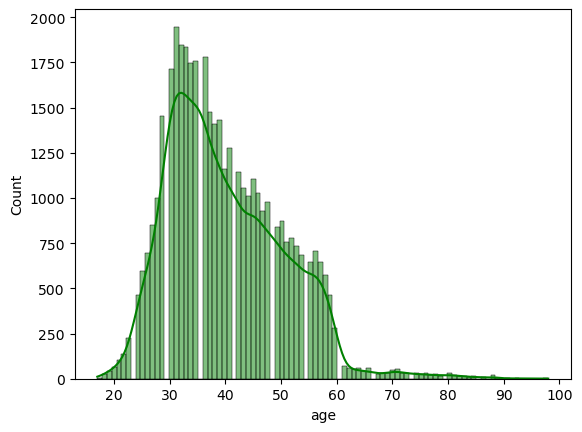

In [23]:
sns.histplot(data,x="age",kde=True,color="green")

### The customer between the age 25 and 60 has targetted more for the subscription.Especially the age at 31,32,33 are highly targetted.
### The age above 60(Retirement age) has no targetted much.

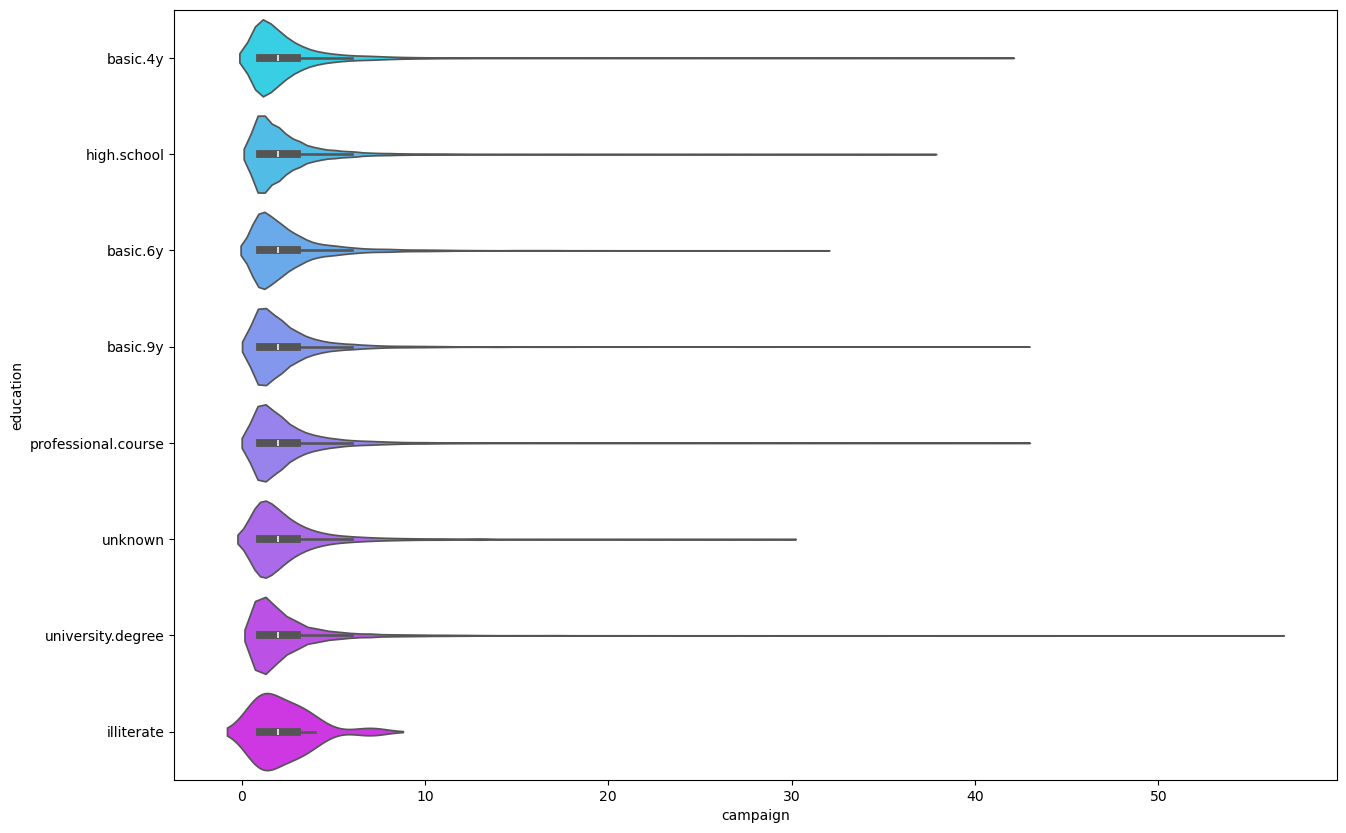

In [24]:
plt.figure(figsize=(15,10),facecolor="white")
sns.violinplot(data=data,y="education",x="campaign",palette="cool")
plt.show()

### The campaign has been covered more on univesity.degree holder and less on iliterate.

Text(87.59722222222221, 0.5, 'PERCENTAGE')

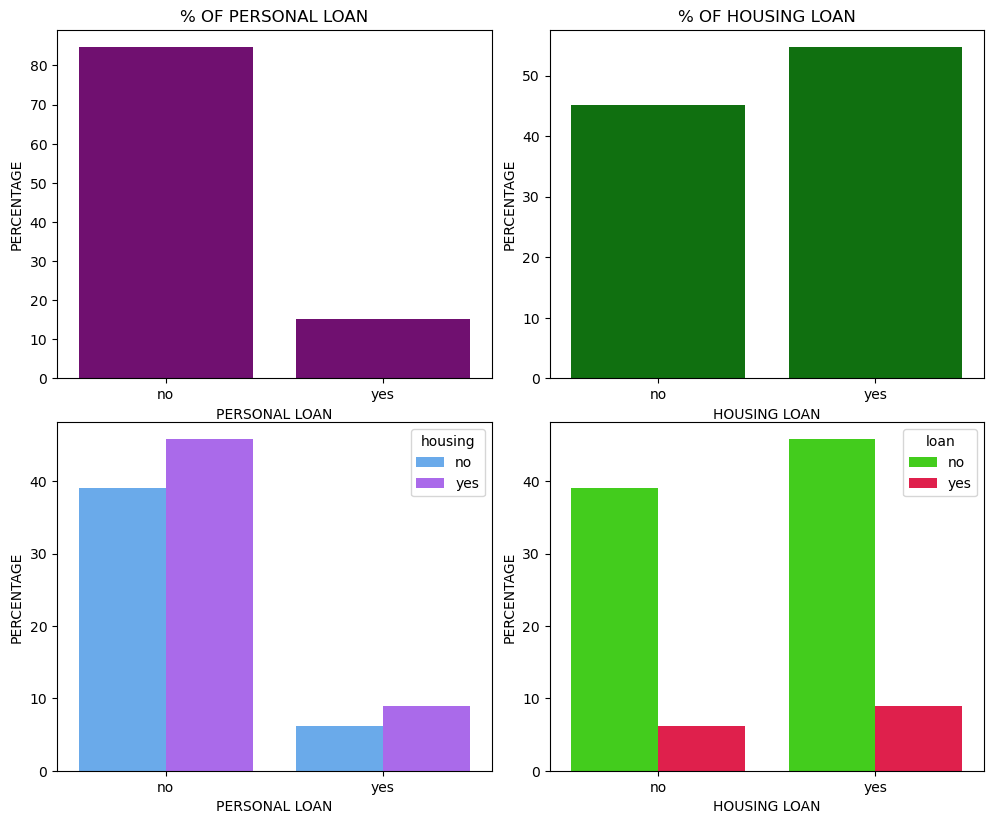

In [25]:
fig_1,ax_1=plt.subplots(figsize=(10,8),nrows=2,ncols=2)
plt.tight_layout()
sns.countplot(data,x="loan",stat="percent",ax=ax_1[0,0],color="purple")
sns.countplot(data,x="housing",stat="percent",ax=ax_1[0,1],color="green")
ax_1[0,0].set_title("% OF PERSONAL LOAN")
ax_1[0,0].set_xlabel("PERSONAL LOAN")
ax_1[0,0].set_ylabel("PERCENTAGE")
ax_1[0,1].set_title("% OF HOUSING LOAN")
ax_1[0,1].set_xlabel("HOUSING LOAN")
ax_1[0,1].set_ylabel("PERCENTAGE")
sns.countplot(data,hue="loan",stat="percent",x="housing",ax=ax_1[1,1],palette="prism")
ax_1[1,1].set_xlabel("HOUSING LOAN")
ax_1[1,1].set_ylabel("PERCENTAGE")
sns.countplot(data,x="loan",stat="percent",hue="housing",ax=ax_1[1,0],palette="cool")
ax_1[1,0].set_xlabel("PERSONAL LOAN")
ax_1[1,0].set_ylabel("PERCENTAGE")

## Nearly 15% of customer have only personal loan and remaining 85% of the customer do not have only the personal loan.
## Nearly 40% of the customer do not have both the housing loan and personal loan.
## Nearly 60% of the customer do not have personal loan but they have housing loan
## 55% of the customer have only housing loan and remaining 45% of the customer do not have only the housing loan.
## Nearly 10% of the customer have both personal and housing loan.
## 5% of the customer have personal loan but they do not have the housing loan.

Text(4, -0.3, 'DEFLATION-Employment contraction')

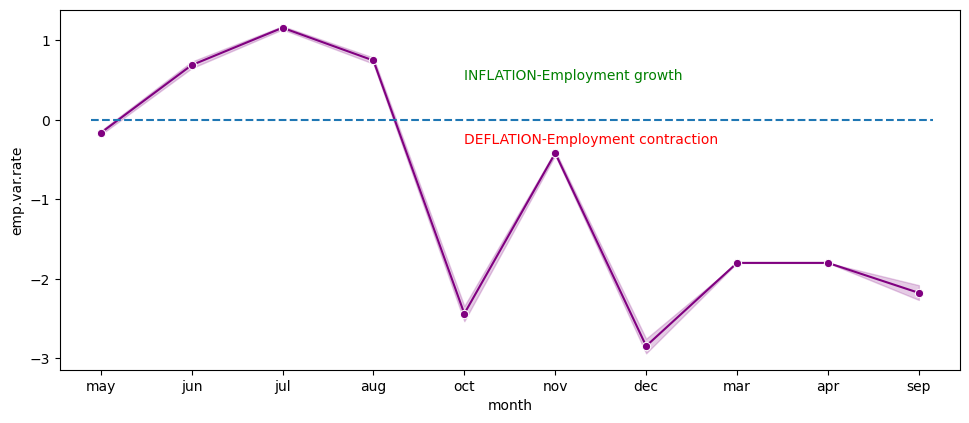

In [26]:
fig3=plt.figure(figsize=(10,4),facecolor="white")
ax3=fig3.add_axes([0.1,0.1,0.9,0.9])
sns.lineplot(data=data,y='emp.var.rate',x="month",marker="o",color="purple")
plt.axhline(y=0,xmin=0.035,xmax=0.97,ls="--")
ax3.text(4,0.5,"INFLATION-Employment growth",color="green")
ax3.text(4,-0.3,"DEFLATION-Employment contraction",color="red")

### JULY month have high emp.var.rate when compare to other months which indicates that there is employment growth in the july month.
### JUNE,JULY AND AUGUST only have the high emp.var.rate whereas remaining month have deflation.
### December have very low emp.var.rate where there is more employment contraction are there.

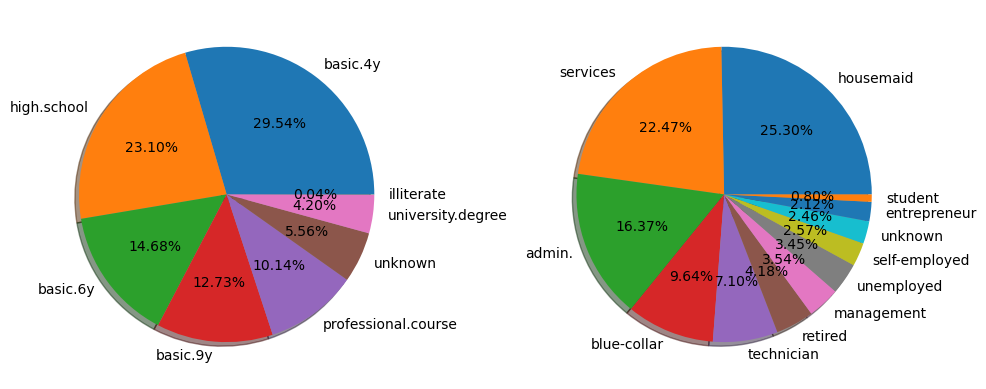

In [27]:
plt.figure(figsize=(10,10),facecolor="white")
plot_num=1
for column in data[["education","job"]]:
    if plot_num<=len(data[["education","job"]]):
         x_listed=list(data[column].value_counts())
         lab=data[column].unique()
         ax=plt.subplot(1,2,plot_num)
         plt.pie(x_listed,labels=lab,shadow=True,autopct="%1.2f%%")
    plot_num+=1
plt.tight_layout()
plt.show()

### More than 50% of the customers are targetted from the background education of high.school(23.10%) and basic.4y(29.54%).
### University.degree have been targetted less and it stands front of illierate.
### In Job category, they mainly targetted on housemaid who are very good in savings for futures.
### After Housemaid ,services job category has been targetted for the subscription.
### Management,unemployed,self_employed,entrepreneur and student are targetted very low percentage (Each has <5%).

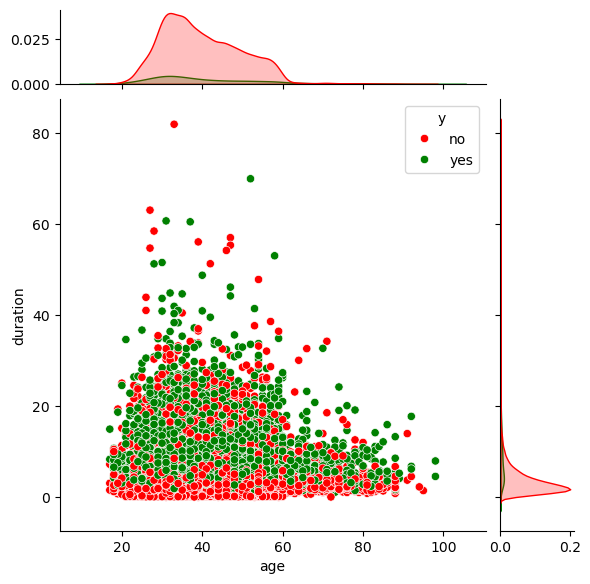

In [28]:
sns.jointplot(data=data, x='age',y=data["duration"]/60,hue="y",palette=["red","green"],marginal_ticks=True)

### The customer has not subscribed more when the duration of the call is less (less than 10 minutes).
### The customer with the age of above 60 are contacted less than 20 minutes.
### The customer with the age nearby 30 have subscribed more eventhough they are contacted less than 20 minutes.


<Axes: xlabel='default', ylabel='count'>

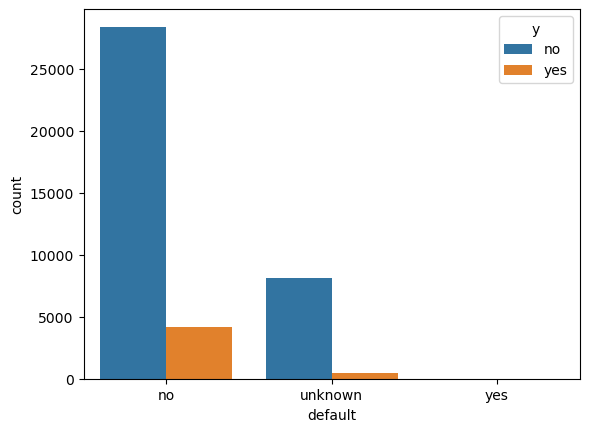

In [29]:
sns.countplot(x="default",data=data,hue="y")

In [30]:
num=data.select_dtypes(include=["int","float"])
num

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


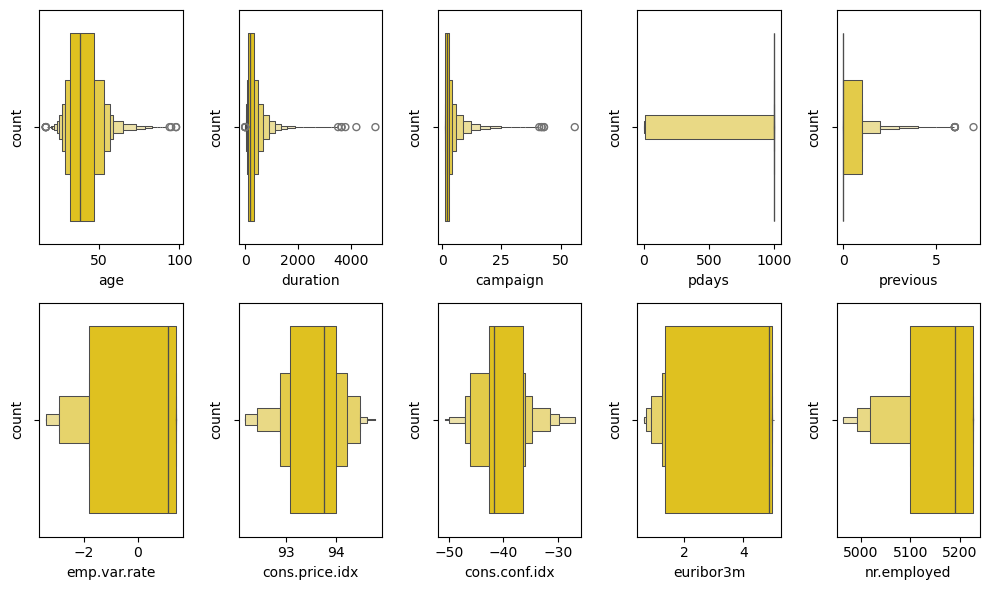

In [31]:
plt.figure(figsize=(10,6),facecolor="white")
boxen=1
for b in num:
   if boxen<=len(num):
       plt.subplot(2,5,boxen)
       sns.boxenplot(data=data,x=data[b],color="gold")
       plt.xlabel(b)
       plt.ylabel("count")
   boxen+=1
plt.tight_layout()


<Axes: xlabel='y', ylabel='duration'>

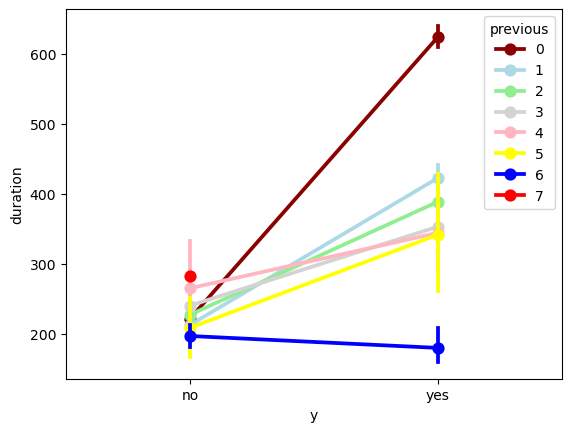

In [32]:
sns.pointplot(data=data,x="y",y="duration",hue="previous",palette=['darkred','lightblue', 'lightgreen', 'lightgrey','lightpink','yellow','blue','red'])

## When the customer contacted first time,it takes the average range of 600 seconds to get the subscription from them.

# DATA PREPROCESSING:

In [33]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## There is no null values in the dataset.

In [34]:
data.duplicated().sum()

12

### There are 12 duplicated rows are there and it will dropped here.

In [35]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [36]:
data.shape

(41188, 21)

In [37]:
data.drop_duplicates(inplace=True)

In [38]:
data.shape

(41176, 21)

# OUTLIERS DETECTION:

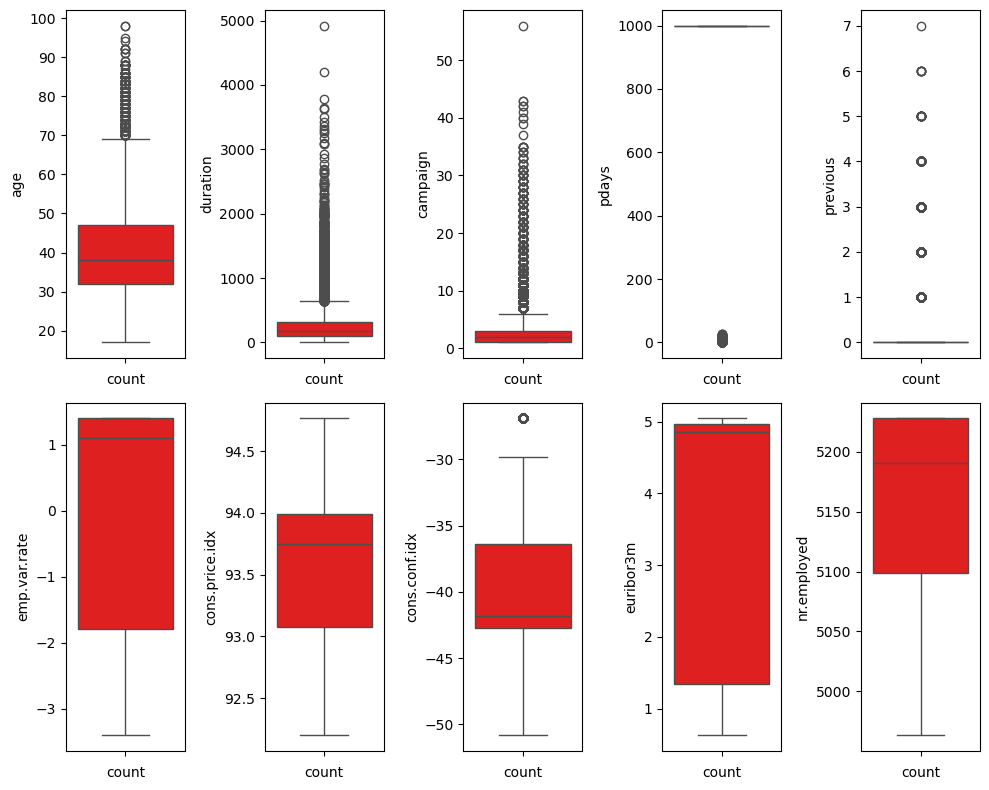

In [39]:
plt.figure(figsize=(10,8),facecolor="white")
box=1
for bx in num:
    if box<=len(num):
        plt.subplot(2,5,box)
        sns.boxplot(data=data,y=data[bx],color="red")
        plt.ylabel(bx)
        plt.xlabel("count")
    box+=1
plt.tight_layout()
plt.show()

In [40]:
num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

## Outliers should be removed from only continuous data,here the outliers detected features are age,duration and cons.conf.idx

In [41]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [42]:
q1_age=data["age"].quantile(0.25)
q3_age=data["age"].quantile(0.75)
iqr_age=q3_age-q1_age
ul_age=q3_age+1.5*iqr_age
ll_age=q1_age-1.5*iqr_age
print(ll_age,ul_age)

9.5 69.5


In [43]:
data.loc[(data["age"]<ll_age) | (data["age"]>ul_age),"age"]

27713    70
27757    76
27780    73
27800    88
27802    88
         ..
40986    84
40996    81
41004    80
41183    73
41187    74
Name: age, Length: 468, dtype: int64

In [44]:
len(data.loc[(data["age"]<ll_age) | (data["age"]>ul_age),"age"])/len(data)*100

1.1365844181076354

In [45]:
data.loc[(data["age"]<ll_age) | (data["age"]>ul_age),"age"]=data["age"].median()

In [46]:
data.loc[(data["age"]<ll_age) | (data["age"]>ul_age),"age"]

Series([], Name: age, dtype: int64)

In [47]:
data["duration"]

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41176, dtype: int64

# LOG TRANSFORMATION ON DATA["DURATION"]

In [48]:
data["duration"]=np.log1p(data["duration"])

In [49]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,5.568345,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,5.010635,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,5.424950,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,5.023881,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,5.730100,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: xlabel='duration'>

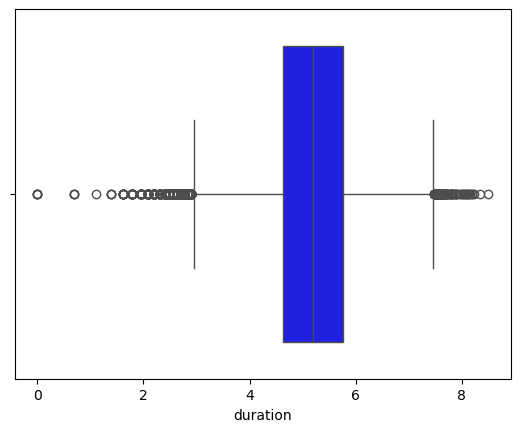

In [50]:
sns.boxplot(data,x="duration",color="blue")

In [51]:
q1_duration=data["duration"].quantile(0.25)
q3_duration=data["duration"].quantile(0.75)
print("q1:  ",q1_duration,"q3: ",q3_duration)
iqr_duration=q3_duration-q1_duration
ul_duration=q3_duration+1.5*iqr_duration
ll_duration=q1_duration-1.5*iqr_duration
print(ll_duration,ul_duration)

q1:   4.634728988229636 q3:  5.768320995793772
2.9343409768834317 7.468709007139976


In [52]:
len(data.loc[(data["duration"]<ll_duration) | (data["duration"]>ul_duration),"duration"])/len(data)*100

2.392170196230814

In [53]:
data.loc[(data["duration"]<ll_duration) | (data["duration"]>ul_duration),"duration"]=data["duration"].median()

In [54]:
data.loc[(data["duration"]<ll_duration) | (data["duration"]>ul_duration),"duration"]

Series([], Name: duration, dtype: float64)

In [55]:
d

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [56]:
q1_cons=data["cons.conf.idx"].quantile(0.25)
q3_cons=data["cons.conf.idx"].quantile(0.75)
print("q1:  ",q1_cons,"q3: ",q3_cons)
iqr_cons=q3_cons-q1_cons
ul_cons=q3_cons+1.5*iqr_cons
ll_cons=q1_cons-1.5*iqr_cons
print(ll_cons,ul_cons)

q1:   -42.7 q3:  -36.4
-52.150000000000006 -26.949999999999992


In [57]:
len(data.loc[(data["cons.conf.idx"]<ll_cons) | (data["cons.conf.idx"]>ul_cons),"cons.conf.idx"])/len(data)*100

1.0831552360598407

In [58]:
data.loc[(data["cons.conf.idx"]<ll_cons) | (data["cons.conf.idx"]>ul_cons),"cons.conf.idx"]=data["cons.conf.idx"].median()

In [59]:
data.loc[(data["cons.conf.idx"]<ll_cons) | (data["cons.conf.idx"]>ul_cons),"cons.conf.idx"]

Series([], Name: cons.conf.idx, dtype: float64)

In [60]:
data.campaign.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

### The campaign value more than 20 have 157 data so we can group the range from 21 to 56 into single group in the value of "21"

In [61]:
data["campaign"].value_counts()

campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [62]:
data['campaign'] = data['campaign'].apply(lambda x: x if x <= 20 else 21)

In [63]:
data["campaign"].value_counts()

campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
21      157
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
Name: count, dtype: int64

In [64]:
data.pdays.value_counts()

pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

## Now 999 changed into -1  to change the larger value for our convinence.

In [65]:
data["pdays"]=data["pdays"].replace({999:-1})

In [66]:
data.pdays.value_counts()

pdays
-1     39661
 3       439
 6       412
 4       118
 9        64
 2        61
 7        60
 12       58
 10       52
 5        46
 13       36
 11       28
 1        26
 15       24
 14       20
 8        18
 0        15
 16       11
 17        8
 18        7
 22        3
 19        3
 21        2
 25        1
 26        1
 27        1
 20        1
Name: count, dtype: int64

In [67]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,5.568345,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,5.010635,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,5.424950,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,5.023881,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,5.730100,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# ENCODING TECHNIQUES:

## The encoding technique will be useful for converting categorical data into numerical data.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [69]:
text_data=data.select_dtypes(include="object")
text_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


## There are 11 features contains the categorical data including the output(y).Now these 11 features will be converted from categorical to numerial data.

In [70]:
data.y.value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [71]:
data["y"].head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [72]:
data["y"]=data["y"].map({"no":0,"yes":1})

In [73]:
data.y.value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

In [74]:
text_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [75]:
data["loan"].value_counts()

loan
no     34928
yes     6248
Name: count, dtype: int64

In [76]:
data["loan"]=data["loan"].map({"no":0,"yes":1})

In [77]:
data["loan"].value_counts()

loan
0    34928
1     6248
Name: count, dtype: int64

In [78]:
data["housing"].value_counts()

housing
yes    22561
no     18615
Name: count, dtype: int64

In [79]:
data["housing"]=data["housing"].map({"no":0,"yes":1})

In [80]:
data["housing"].value_counts()

housing
1    22561
0    18615
Name: count, dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

# LABEL ENCODING TECHNIQUE:

In [82]:
data.select_dtypes(include="object").head()

,job,marital,education,default,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,telephone,may,mon,nonexistent
2,services,married,high.school,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,telephone,may,mon,nonexistent


In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
label=LabelEncoder()

In [85]:
data["job"].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [86]:
data["job"]=label.fit_transform(data["job"])

In [87]:
data["job"].value_counts()

job
0     10419
1      9253
9      6739
7      3967
4      2924
5      1718
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: count, dtype: int64

In [88]:
data["marital"].value_counts()

marital
married     25001
single      11564
divorced     4611
Name: count, dtype: int64

In [89]:
data["marital"]=label.fit_transform(data["marital"])

In [90]:
data["marital"].value_counts()

marital
1    25001
2    11564
0     4611
Name: count, dtype: int64

In [91]:
data["education"].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [92]:
data["education"]=label.fit_transform(data["education"])

In [93]:
data["education"].value_counts()

education
6    12164
3     9512
2     6045
5     5240
0     4176
1     2291
7     1730
4       18
Name: count, dtype: int64

In [94]:
data["default"].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [95]:
data["default"]=label.fit_transform(data["default"])

In [96]:
data["default"].value_counts()

default
0    32577
1     8596
2        3
Name: count, dtype: int64

In [97]:
data["contact"].value_counts()

contact
cellular     26135
telephone    15041
Name: count, dtype: int64

In [98]:
data["contact"]=label.fit_transform(data["contact"])

In [99]:
data["contact"].value_counts()

contact
0    26135
1    15041
Name: count, dtype: int64

In [100]:
data["month"].value_counts()

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [101]:
data["month"]=label.fit_transform(data["month"])

In [102]:
data["month"].value_counts()

month
6    13767
3     7169
1     6176
4     5318
7     4100
0     2631
8      717
9      570
5      546
2      182
Name: count, dtype: int64

In [103]:
data["day_of_week"].value_counts()

day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64

In [104]:
data["day_of_week"]=label.fit_transform(data["day_of_week"])

In [105]:
data["day_of_week"].value_counts()

day_of_week
2    8618
1    8512
4    8134
3    8086
0    7826
Name: count, dtype: int64

In [106]:
data['poutcome'].value_counts() 

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

In [107]:
data["poutcome"]=label.fit_transform(data["poutcome"])

In [108]:
data['poutcome'].value_counts() 

poutcome
1    35551
0     4252
2     1373
Name: count, dtype: int64

# AFTER APPLYING ENCODING TECHNIQUES:`

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int32  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int32  
 9   day_of_week     41176 non-null  int32  
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int32  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

## After applying the encoding technique all the categorical data converted into numerical data.

In [110]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,5.568345,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,5.010635,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,5.424950,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,5.023881,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,5.730100,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# SCALING TECHNIQUES:

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scale=MinMaxScaler()

In [113]:
data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]=scale.fit_transform(data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                                                           'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                                                           'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                                                           'cons.conf.idx', 'euribor3m', 'nr.employed']])

In [114]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.750000,0.272727,0.5,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.580427,0.0,0.0,0.0,0.5,0.9375,0.698753,0.685714,0.957379,0.859735,0
1,0.769231,0.636364,0.5,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.457058,0.0,0.0,0.0,0.5,0.9375,0.698753,0.685714,0.957379,0.859735,0
2,0.384615,0.636364,0.5,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.548707,0.0,0.0,0.0,0.5,0.9375,0.698753,0.685714,0.957379,0.859735,0
3,0.442308,0.000000,0.5,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.459988,0.0,0.0,0.0,0.5,0.9375,0.698753,0.685714,0.957379,0.859735,0
4,0.750000,0.636364,0.5,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.616209,0.0,0.0,0.0,0.5,0.9375,0.698753,0.685714,0.957379,0.859735,0


# HEATMAP:

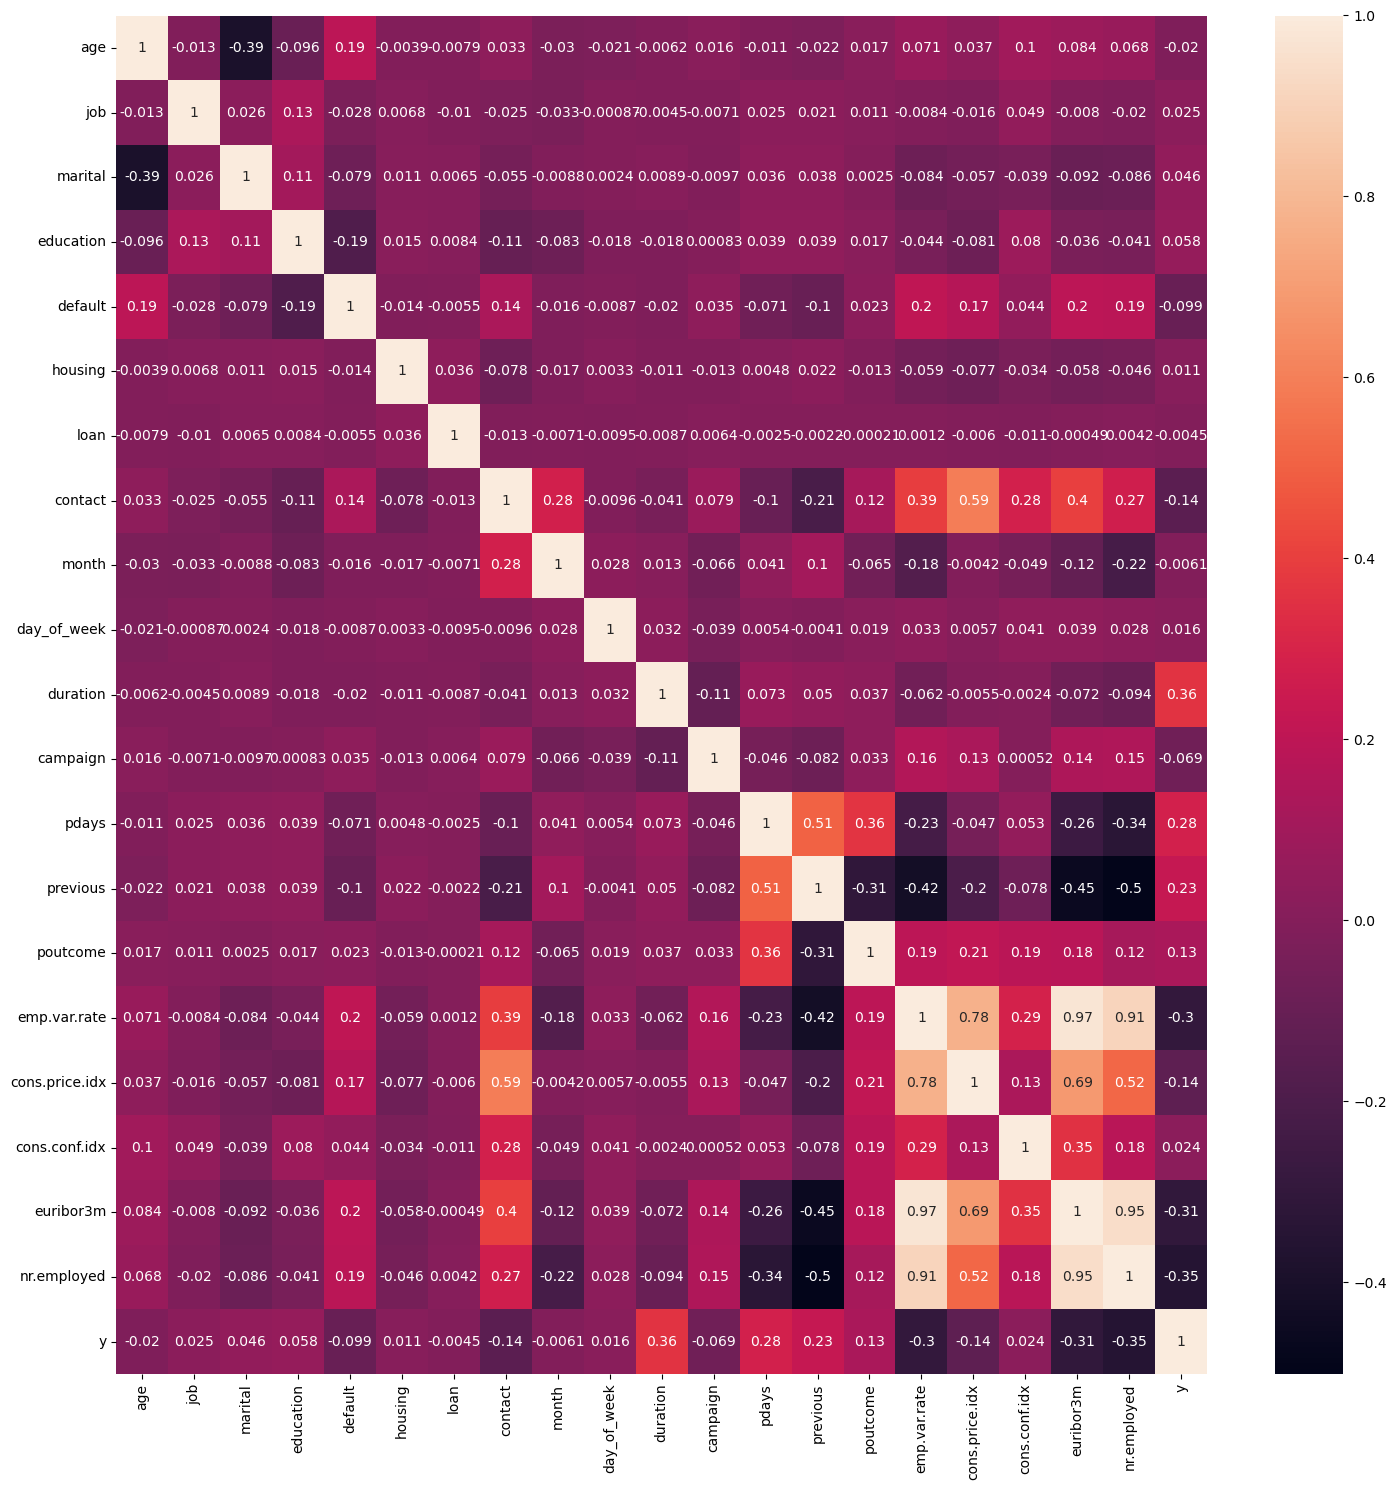

In [115]:
plt.figure(figsize=(15,15),facecolor="white")
sns.heatmap(data.corr(),annot=True,linecolor="black")
plt.tight_layout()

In [116]:
cor=data.corr()
cor

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.013276,-0.392024,-0.096353,0.190914,-0.003863,-0.007869,0.032989,-0.030454,-0.020661,-0.006239,0.016364,-0.011419,-0.021825,0.016569,0.070892,0.036791,0.101042,0.083740,0.067970,-0.020295
job,-0.013276,1.000000,0.025721,0.134159,-0.028282,0.006770,-0.010202,-0.025054,-0.033007,-0.000868,-0.004496,-0.007065,0.024629,0.021007,0.011485,-0.008443,-0.016122,0.048981,-0.008024,-0.019728,0.025248
marital,-0.392024,0.025721,1.000000,0.108527,-0.079001,0.011346,0.006500,-0.054636,-0.008817,0.002445,0.008914,-0.009664,0.035921,0.037723,0.002456,-0.083641,-0.056775,-0.039285,-0.091545,-0.086033,0.045896
education,-0.096353,0.134159,0.108527,1.000000,-0.186811,0.015344,0.008405,-0.105722,-0.082739,-0.017989,-0.017849,0.000833,0.038729,0.038880,0.016987,-0.043695,-0.081499,0.079895,-0.036321,-0.041455,0.057776
default,0.190914,-0.028282,-0.079001,-0.186811,1.000000,-0.014419,-0.005535,0.135275,-0.015787,-0.008660,-0.020355,0.035108,-0.070527,-0.102458,0.023437,0.203257,0.168076,0.044036,0.195335,0.189846,-0.099364
housing,-0.003863,0.006770,0.011346,0.015344,-0.014419,1.000000,0.036399,-0.077851,-0.016918,0.003348,-0.011473,-0.012568,0.004791,0.021654,-0.012578,-0.059152,-0.077245,-0.034271,-0.058239,-0.045619,0.011145
loan,-0.007869,-0.010202,0.006500,0.008405,-0.005535,0.036399,1.000000,-0.013398,-0.007105,-0.009485,-0.008673,0.006423,-0.002488,-0.002187,-0.000213,0.001183,-0.005985,-0.011211,-0.000488,0.004212,-0.004478
contact,0.032989,-0.025054,-0.054636,-0.105722,0.135275,-0.077851,-0.013398,1.000000,0.276499,-0.009614,-0.041361,0.079066,-0.102405,-0.212903,0.118773,0.393730,0.591596,0.282537,0.399892,0.269285,-0.144774
month,-0.030454,-0.033007,-0.008817,-0.082739,-0.015787,-0.016918,-0.007105,0.276499,1.000000,0.027683,0.012904,-0.065514,0.040804,0.103151,-0.065010,-0.178724,-0.004183,-0.049487,-0.117216,-0.221370,-0.006051
day_of_week,-0.020661,-0.000868,0.002445,-0.017989,-0.008660,0.003348,-0.009485,-0.009614,0.027683,1.000000,0.031906,-0.039381,0.005429,-0.004103,0.018733,0.033288,0.005674,0.041327,0.039064,0.028414,0.015970


In [117]:
cor[np.abs(cor)>=0.85]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# correlation of emp.var.rate with other columns

In [118]:
data.corr()["emp.var.rate"].sort_values(ascending=False)

emp.var.rate      1.000000
euribor3m         0.972244
nr.employed       0.906949
cons.price.idx    0.775293
contact           0.393730
cons.conf.idx     0.287391
default           0.203257
poutcome          0.193015
campaign          0.155710
age               0.070892
day_of_week       0.033288
loan              0.001183
job              -0.008443
education        -0.043695
housing          -0.059152
duration         -0.062408
marital          -0.083641
month            -0.178724
pdays            -0.229354
y                -0.298289
previous         -0.420587
Name: emp.var.rate, dtype: float64

# Correlation of target with each features:

In [119]:
tar_corr=data.corr()["y"].sort_values(ascending=False)
tar_corr

y                 1.000000
duration          0.358178
pdays             0.279053
previous          0.230202
poutcome          0.129810
education         0.057776
marital           0.045896
job               0.025248
cons.conf.idx     0.023862
day_of_week       0.015970
housing           0.011145
loan             -0.004478
month            -0.006051
age              -0.020295
campaign         -0.068546
default          -0.099364
cons.price.idx   -0.136134
contact          -0.144774
emp.var.rate     -0.298289
euribor3m        -0.307740
nr.employed      -0.354669
Name: y, dtype: float64

## 1) The features like emp.var.rate,euribor3m and nr.employed have high correlation among themselves,out of these three features any two features will be dropped.
## 2) Above three features emp.var.rate and euribor3m will be dropped,because nr.employed have the high correlation with the target variable when compared with the other two features.
## 3) Therefore emp.var.rate and euribor3m will be dropped.


In [120]:
data.shape

(41176, 21)

In [121]:
data.drop(["emp.var.rate","euribor3m"],axis=1,inplace=True)

In [122]:
data.shape

(41176, 19)

In [123]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,0.750000,0.272727,0.5,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.580427,0.0,0.0,0.0,0.5,0.698753,0.685714,0.859735,0
1,0.769231,0.636364,0.5,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.457058,0.0,0.0,0.0,0.5,0.698753,0.685714,0.859735,0
2,0.384615,0.636364,0.5,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.548707,0.0,0.0,0.0,0.5,0.698753,0.685714,0.859735,0
3,0.442308,0.000000,0.5,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.459988,0.0,0.0,0.0,0.5,0.698753,0.685714,0.859735,0
4,0.750000,0.636364,0.5,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.616209,0.0,0.0,0.0,0.5,0.698753,0.685714,0.859735,0


# MODEL BUILDING:

In [124]:
x=data.drop("y",axis=1)
y=data["y"]

In [125]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed
0,0.750000,0.272727,0.5,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.580427,0.0,0.0,0.0,0.5,0.698753,0.685714,0.859735
1,0.769231,0.636364,0.5,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.457058,0.0,0.0,0.0,0.5,0.698753,0.685714,0.859735
2,0.384615,0.636364,0.5,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.548707,0.0,0.0,0.0,0.5,0.698753,0.685714,0.859735
3,0.442308,0.000000,0.5,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.459988,0.0,0.0,0.0,0.5,0.698753,0.685714,0.859735
4,0.750000,0.636364,0.5,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.616209,0.0,0.0,0.0,0.5,0.698753,0.685714,0.859735


In [126]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [128]:
x_train.shape

(32940, 18)

In [129]:
x_test.shape

(8236, 18)

In [130]:
y_train.shape

(32940,)

In [131]:
y_test.shape

(8236,)

# APPLYING SMOTE:

In [132]:
y_train.shape

(32940,)

In [133]:
x_train.shape

(32940, 18)

## The y_train have 29272 of "0" values and only 3668 of "1" values are there.

## There is imbalance in the output for the training dataset to make them balance we use SMOTE

In [134]:
#pip install --upgrade numpy scikit-learn imbalanced-learn threadpoolctl

In [135]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)

In [136]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [137]:
from collections import Counter
print("y_train: ",Counter(y_train))
print("y_smote: ",Counter(y_smote))

y_train:  Counter({0: 29272, 1: 3668})
y_smote:  Counter({0: 29272, 1: 29272})


### Now the data is balanced in tranining set.

### FOR APPLYING THE SMOTE: Use x_smote and y_smote.
### FOR NOT APPLYING THE SMOTE: Use x_train and y_train

# LOGISTIC REGRESSION WITHOUT APPLYING THE SMOTE:

In [138]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [139]:
y_pre_lr=lr.predict(x_test)

### EVALUATION METRICS:

In [140]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
print("ACCURACY SCORE OF LOGISTIC REGRESSION:   ",accuracy_score(y_test,y_pre_lr)*100)
print("\n\n")
print("F1 SCORE OF LOGISTIC REGRESSION:   ",f1_score(y_test,y_pre_lr)*100)
print("\n\n")
print(classification_report(y_test,y_pre_lr))

ACCURACY SCORE OF LOGISTIC REGRESSION:    90.69936862554638



F1 SCORE OF LOGISTIC REGRESSION:    49.737532808398946



              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7265
           1       0.69      0.39      0.50       971

    accuracy                           0.91      8236
   macro avg       0.80      0.68      0.72      8236
weighted avg       0.89      0.91      0.90      8236



In [142]:
pd.crosstab(y_test,y_pre_lr)

col_0,0,1
y,,
0,7091,174
1,592,379


Text(0.5, 1.0, 'CONFUSION MATRIX')

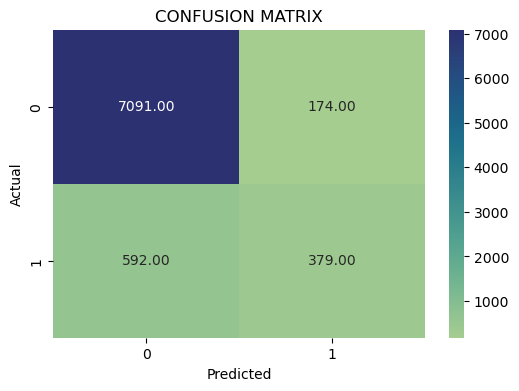

In [143]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_lr),annot=True,cmap="crest",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# LOGISTICS REGRESSION BY APPLYING THE SMOTE:

In [144]:
lr_sm=LogisticRegression()
lr_sm.fit(x_smote,y_smote)

LogisticRegression()

In [145]:
y_pre_lr_sm=lr_sm.predict(x_test)

In [146]:
print("ACCURACY SCORE OF LOGISTIC REGRESSION:   ",accuracy_score(y_test,y_pre_lr_sm)*100)
print("\n\n")
print("F1 SCORE OF LOGISTIC REGRESSION:   ",f1_score(y_test,y_pre_lr_sm)*100)
print("\n\n")
print(classification_report(y_test,y_pre_lr_sm))
pd.crosstab(y_test,y_pre_lr_sm)

ACCURACY SCORE OF LOGISTIC REGRESSION:    83.88780961631859



F1 SCORE OF LOGISTIC REGRESSION:    55.00169548999661



              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7265
           1       0.41      0.84      0.55       971

    accuracy                           0.84      8236
   macro avg       0.69      0.84      0.73      8236
weighted avg       0.91      0.84      0.86      8236



col_0,0,1
y,,
0,6098,1167
1,160,811


Text(0.5, 1.0, 'CONFUSION MATRIX')

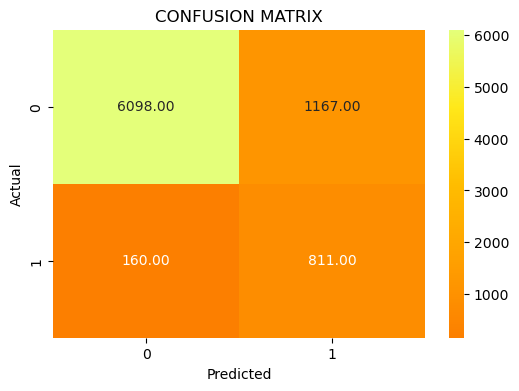

In [147]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_lr_sm),annot=True,cmap="Wistia_r",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# SUPPORT MACHINE VECTOR:

In [148]:
from sklearn.svm import SVC
svc=SVC(random_state=42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [149]:
y_pre_svc=svc.predict(x_test)

In [150]:
print("ACCURACY SCORE OF SVC:   ",accuracy_score(y_test,y_pre_svc)*100)
print("\n\n")
print("F1 SCORE OF SVC:   ",f1_score(y_test,y_pre_svc)*100)
print("\n\n")
print(classification_report(y_test,y_pre_svc))
pd.crosstab(y_test,y_pre_svc)

ACCURACY SCORE OF SVC:    90.25012141816416



F1 SCORE OF SVC:    40.20848845867461



              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7265
           1       0.73      0.28      0.40       971

    accuracy                           0.90      8236
   macro avg       0.82      0.63      0.67      8236
weighted avg       0.89      0.90      0.88      8236



col_0,0,1
y,,
0,7163,102
1,701,270


Text(0.5, 1.0, 'CONFUSION MATRIX')

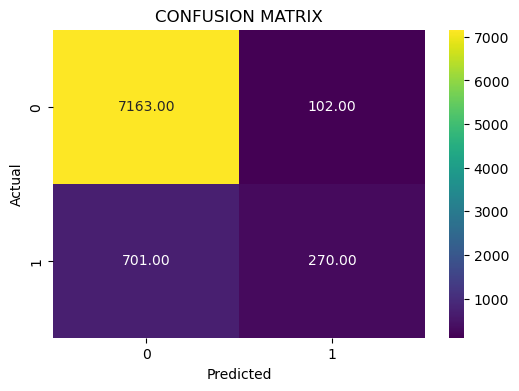

In [151]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_svc),annot=True,cmap="viridis",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

## HYPERPARAMETER IN SVC:

In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
#from sklearn.model_selection import cross_val_score
#k_values_svc=range(2,6)
#cv_scores_svc=[]
#for i in k_values_svc:
    #scores_svc=cross_val_score(SVC(random_state=42),x_train,y_train,cv=i,scoring="f1")
    #cv_scores_svc.append(scores_svc.mean())
    #print(i,scores_svc.mean(),scores_svc.std())
#best_k_svc=k_values_svc[cv_scores_svc.index(max(cv_scores_svc))]
#print("The best cross_validation in SVC for smote:",best_k_svc)

In [154]:
from sklearn.model_selection import GridSearchCV
param_svc={
    "C":[0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}

In [155]:
#grid_svc=GridSearchCV(SVC(random_state=42),param_svc,verbose=3,scoring="f1",cv=5)

In [156]:
#grid_svc.fit(x_train,y_train)

In [157]:
#print(grid_svc.best_params_)
#print(grid_svc.best_estimator_)
#print(grid_svc.best_score_)

In [158]:
hp_svc=SVC(C=100, gamma=1, random_state=42)

In [159]:
hp_svc.fit(x_train,y_train)

SVC(C=100, gamma=1, random_state=42)

In [160]:
y_pre_hp_svc=hp_svc.predict(x_test)

In [161]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_svc)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_svc)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_svc))

ACCURACY_SCORE:  89.27877610490529



F1__SCORE:  51.08033240997229



CROSS_TAB

 col_0     0    1
y               
0      6892  373
1       510  461


In [162]:
print("CLASSIFICATION_REPORT: /n",classification_report(y_test,y_pre_hp_svc))

CLASSIFICATION_REPORT: /n               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7265
           1       0.55      0.47      0.51       971

    accuracy                           0.89      8236
   macro avg       0.74      0.71      0.73      8236
weighted avg       0.89      0.89      0.89      8236



Text(0.5, 1.0, 'CONFUSION MATRIX')

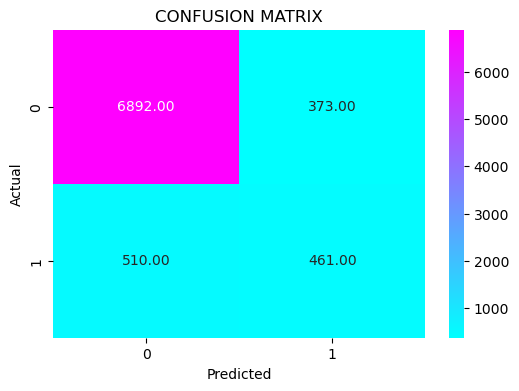

In [163]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_hp_svc),annot=True,cmap="cool",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# SUPPORT MACHINE VECTOR BY APPLYING THE SMOTE:

In [164]:
svc_sm=SVC(random_state=42)
svc_sm.fit(x_smote,y_smote)

SVC(random_state=42)

In [165]:
y_pre_svc_sm=svc_sm.predict(x_test)

In [166]:
print("ACCURACY SCORE OF SVC:   ",accuracy_score(y_test,y_pre_svc_sm)*100)
print("\n\n")
print("F1 SCORE OF SVC:   ",f1_score(y_test,y_pre_svc_sm)*100)
print("\n\n")
print(classification_report(y_test,y_pre_svc_sm))
pd.crosstab(y_test,y_pre_svc_sm)

ACCURACY SCORE OF SVC:    84.72559494900437



F1 SCORE OF SVC:    57.12338104976141



              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7265
           1       0.43      0.86      0.57       971

    accuracy                           0.85      8236
   macro avg       0.70      0.85      0.74      8236
weighted avg       0.91      0.85      0.87      8236



col_0,0,1
y,,
0,6140,1125
1,133,838


Text(0.5, 1.0, 'CONFUSION MATRIX')

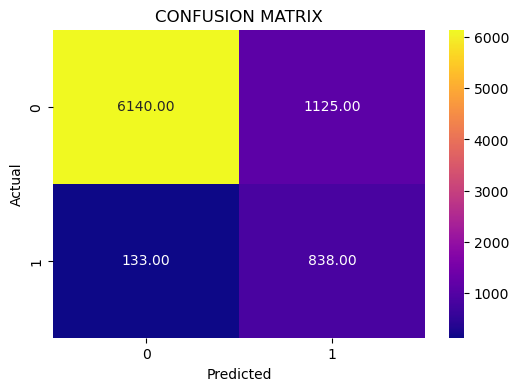

In [167]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_svc_sm),annot=True,cmap="plasma",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# HYPERPARAMETER TUNING FOR SVM BY APPLYING THE SMOTE:

In [168]:
#k_values_svc_sm=range(2,6)
#cv_scores_svc_sm=[]
#for i in k_values_svc_sm:
    #scores_svc_sm=cross_val_score(SVC(random_state=42),x_smote,y_smote,cv=i,scoring="f1")
    #cv_scores_svc_sm.append(scores_svc_sm.mean())
    #print(i,scores_svc_sm.mean(),scores_svc_sm.std())
#best_k_svc_sm=k_values_svc_sm[cv_scores_svc_sm.index(max(cv_scores_svc_sm))]
#print("The best cross_validation in svc_sm for smote:",best_k_svc_sm)

In [169]:
#param_svc_sm={
    #"C":[0.01, 0.1, 1, 10, 100],
    #'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
#}

In [170]:
#grid_svc_sm=GridSearchCV(SVC(random_state=42),param_svc_sm,verbose=3,scoring="f1",cv=5)

In [171]:
#grid_svc_sm.fit(x_smote,y_smote)

In [172]:
#print(grid_svc_sm.best_params_)
#print(grid_svc_sm.best_estimator_)
#print(grid_svc_sm.best_score_)

In [173]:
hp_svc_sm=SVC(C=100, gamma=1, random_state=42)

In [174]:
hp_svc_sm.fit(x_smote,y_smote)

SVC(C=100, gamma=1, random_state=42)

In [175]:
y_pre_hp_svc_sm=hp_svc_sm.predict(x_test)

In [176]:
print("ACCURACY SCORE OF SVC:   ",accuracy_score(y_test,y_pre_hp_svc_sm)*100)
print("\n\n")
print("F1 SCORE OF SVC:   ",f1_score(y_test,y_pre_hp_svc_sm)*100)
print("\n\n")
print(classification_report(y_test,y_pre_hp_svc_sm))
pd.crosstab(y_test,y_pre_hp_svc_sm)

ACCURACY SCORE OF SVC:    87.23895094706168



F1 SCORE OF SVC:    51.5891294334408



              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7265
           1       0.47      0.58      0.52       971

    accuracy                           0.87      8236
   macro avg       0.70      0.74      0.72      8236
weighted avg       0.89      0.87      0.88      8236



col_0,0,1
y,,
0,6625,640
1,411,560


Text(0.5, 1.0, 'CONFUSION MATRIX')

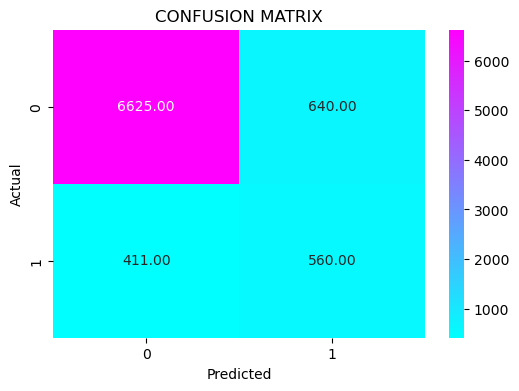

In [177]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_hp_svc_sm),annot=True,cmap="cool",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# DECISION TREE:

In [178]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pre_dt=dt.predict(x_test)

In [179]:
print("ACCURACY SCORE OF DT:   ",accuracy_score(y_test,y_pre_dt)*100)
print("\n\n")
print("F1 SCORE OF DT:   ",f1_score(y_test,y_pre_dt)*100)
print("\n\n")
print(classification_report(y_test,y_pre_dt))
pd.crosstab(y_test,y_pre_dt)

ACCURACY SCORE OF DT:    88.18601262748908



F1 SCORE OF DT:    49.66373512674599



              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7265
           1       0.50      0.49      0.50       971

    accuracy                           0.88      8236
   macro avg       0.72      0.71      0.71      8236
weighted avg       0.88      0.88      0.88      8236



col_0,0,1
y,,
0,6783,482
1,491,480


Text(0.5, 1.0, 'CONFUSION MATRIX')

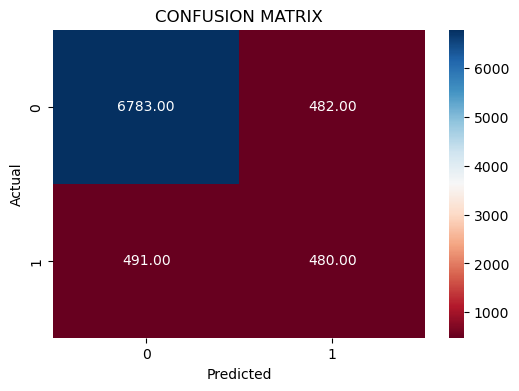

In [180]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_dt),annot=True,cmap="RdBu",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# HYPERPARAMETER TUNINNG OF DECISION TREE:

In [181]:
#k_values_dt=range(2,6)
#cv_scores_dt=[]
#for i in k_values_dt:
 #   scores_dt=cross_val_score(DecisionTreeClassifier(random_state=42),x_train,y_train,cv=i,scoring="f1")
  #  cv_scores_dt.append(scores_dt.mean())
    #print(i,scores_dt.mean(),scores_dt.std())
#best_k_dt=k_values_dt[cv_scores_dt.index(max(cv_scores_dt))]
#print("The best cross_validation in dt for smote:",best_k_dt)

In [182]:
#param_dt={
 #   "criterion":("gini","entropy"),
 #   "splitter":("best","random"),
  #  "max_depth":(list(range(1,9))),
 #   "min_samples_split":(list(range(1,5))),
#    "min_samples_leaf":(list(range(1,10)))
# }

In [183]:
#grid_dt=GridSearchCV(DecisionTreeClassifier(random_state=42),param_dt,n_jobs=-1,verbose=3,cv=5,scoring="f1")

In [184]:
#grid_dt.fit(x_train,y_train)

In [185]:
#print(grid_dt.best_score_)
#print(grid_dt.best_estimator_)
#print(grid_dt.best_params_)

In [186]:
hp_dt=DecisionTreeClassifier(max_depth=3, random_state=42)

In [187]:
hp_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [188]:
y_pre_hp_dt=hp_dt.predict(x_test)

In [189]:
print("ACCURACY SCORE OF DT:   ",accuracy_score(y_test,y_pre_hp_dt)*100)
print("\n\n")
print("F1 SCORE OF DT:   ",f1_score(y_test,y_pre_hp_dt)*100)
print("\n\n")
print(classification_report(y_test,y_pre_hp_dt))
pd.crosstab(y_test,y_pre_hp_dt)

ACCURACY SCORE OF DT:    90.54152501214182



F1 SCORE OF DT:    58.095750403442715



              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7265
           1       0.61      0.56      0.58       971

    accuracy                           0.91      8236
   macro avg       0.77      0.75      0.76      8236
weighted avg       0.90      0.91      0.90      8236



col_0,0,1
y,,
0,6917,348
1,431,540


Text(0.5, 1.0, 'CONFUSION MATRIX')

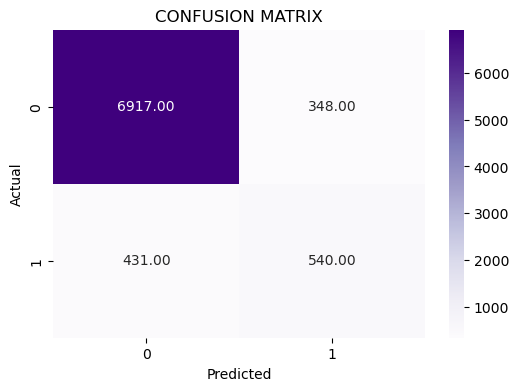

In [190]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_hp_dt),annot=True,cmap="Purples",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# DECISION TREE BY APPLYING THE SMOTE:

In [191]:
dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

DecisionTreeClassifier(random_state=42)

In [192]:
y_pre_dt_sm=dt_sm.predict(x_test)

In [193]:
print("ACCURACY SCORE OF DT:   ",accuracy_score(y_test,y_pre_dt_sm)*100)
print("\n\n")
print("F1 SCORE OF DT:   ",f1_score(y_test,y_pre_dt_sm)*100)
print("\n\n")
print(classification_report(y_test,y_pre_dt_sm))
pd.crosstab(y_test,y_pre_dt_sm)

ACCURACY SCORE OF DT:    87.70033997085964



F1 SCORE OF DT:    53.08012968967114



              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7265
           1       0.48      0.59      0.53       971

    accuracy                           0.88      8236
   macro avg       0.71      0.75      0.73      8236
weighted avg       0.89      0.88      0.88      8236



col_0,0,1
y,,
0,6650,615
1,398,573


Text(0.5, 1.0, 'CONFUSION MATRIX')

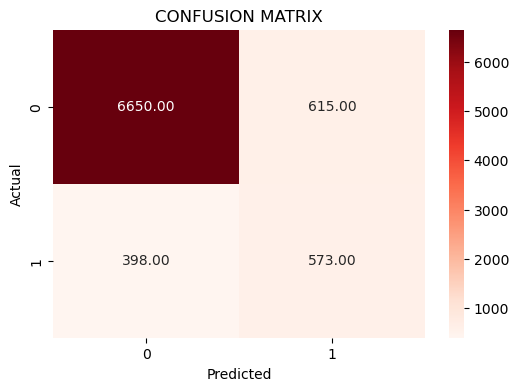

In [194]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_dt_sm),annot=True,cmap="Reds",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# HYPERPARAMETER IN DECISION TREE BY APPLYING THE SMOTE:

In [195]:
#k_dt_sm=range(2,6)
#cv_score_dt_sm=[]
#for i  in k_dt_sm:
  #  score_dt_sm=cross_val_score(DecisionTreeClassifier(random_state=42),x_smote,y_smote,cv=i,scoring="f1")
   # cv_score_dt_sm.append(score_dt_sm.mean())
 #   print(i,score_dt_sm.mean(),score_dt_sm.std())
#best_k_dt_sm=k_dt_sm[cv_score_dt_sm.index(max(cv_score_dt_sm))]
#print("The best cross_validation ",best_k_dt_sm)

In [196]:
#param_dt_sm={
 #   "criterion":["gini","entropy"],
 #   "splitter":["best","random"],
  #  "max_depth":(list(range(1,10))),
 #   "min_samples_split":(list(range(1,10))),
 #   "min_samples_leaf":(list(range(1,10)))
#}

In [197]:
#rid_dt_sm=GridSearchCV(DecisionTreeClassifier(random_state=42),param_dt_sm,n_jobs=-1,verbose=4,cv=5,scoring="f1")

In [198]:
#grid_dt_sm.fit(x_smote,y_smote)

In [199]:
#print(grid_dt_sm.best_score_)
#print(grid_dt_sm.best_estimator_)
#print(grid_dt_sm.best_params_)

In [200]:
hp_dt_sm=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=8, random_state=42)

In [201]:
hp_dt_sm.fit(x_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=8, random_state=42)

In [202]:
y_pre_hp_dt_sm=hp_dt_sm.predict(x_test)

In [203]:
print("ACCURACY SCORE OF DT:   ",accuracy_score(y_test,y_pre_hp_dt_sm)*100)
print("\n\n")
print("F1 SCORE OF DT:   ",f1_score(y_test,y_pre_hp_dt_sm)*100)
print("\n\n")
print(classification_report(y_test,y_pre_hp_dt_sm))
pd.crosstab(y_test,y_pre_hp_dt_sm)

ACCURACY SCORE OF DT:    86.34045653229722



F1 SCORE OF DT:    59.80707395498393



              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7265
           1       0.46      0.86      0.60       971

    accuracy                           0.86      8236
   macro avg       0.72      0.86      0.76      8236
weighted avg       0.92      0.86      0.88      8236



col_0,0,1
y,,
0,6274,991
1,134,837


Text(0.5, 1.0, 'CONFUSION MATRIX')

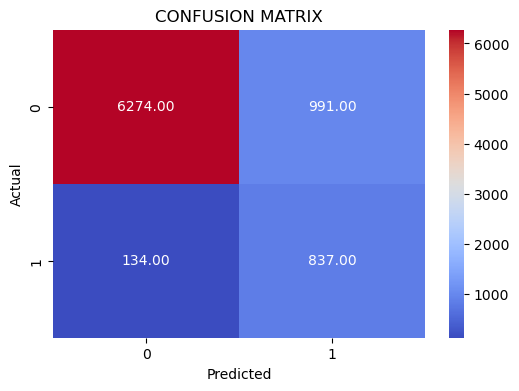

In [204]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_hp_dt_sm),annot=True,cmap="coolwarm",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# RANDOM FOREST:

In [205]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,n_estimators=100)
rf.fit(x_train,y_train)
y_pre_rf=rf.predict(x_test)

In [206]:
print("ACCURACY SCORE:   ",accuracy_score(y_test,y_pre_rf)*100)
print("\n\n")
print("F1 SCORE:   ",f1_score(y_test,y_pre_rf)*100)
print("\n\n")
print(classification_report(y_test,y_pre_rf))
pd.crosstab(y_test,y_pre_rf)

ACCURACY SCORE OF DT:    91.12433220009713



F1 SCORE OF DT:    56.71995263469508



              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.67      0.49      0.57       971

    accuracy                           0.91      8236
   macro avg       0.80      0.73      0.76      8236
weighted avg       0.90      0.91      0.91      8236



col_0,0,1
y,,
0,7026,239
1,492,479


Text(0.5, 1.0, 'CONFUSION MATRIX')

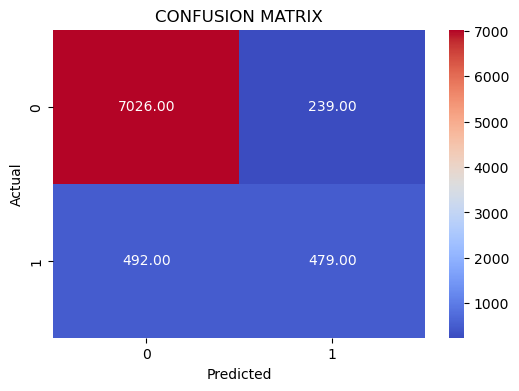

In [207]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_rf),annot=True,cmap="coolwarm",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# HYPERPARAMETER TUNING IN RANDOM FOREST:

In [208]:
#k_rf=range(2,6)
#cv_score_rf=[]
#for i  in k_rf:
  #  score_rf=cross_val_score(RandomForestClassifier(random_state=42),x_train,y_train,cv=i,scoring="f1")
   # cv_score_rf.append(score_rf.mean())
   # print(i,score_rf.mean(),score_rf.std())
#best_k_rf=k_rf[cv_score_rf.index(max(cv_score_rf))]
#print("The best cross_validation ",best_k_rf)

In [209]:
#param_rf={
  #  "n_estimators":[x for x in np.arange(100,301,100)],
   # "max_depth":(list(range(1,6))),
  #  "min_samples_split":(list(range(1,6))),
   # "min_samples_leaf":(list(range(1,6))),
  #  "max_features":['sqrt','log2'],
  #  "bootstrap":[True,False]
#}

In [210]:
#grid_rf=GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_rf,cv=4,verbose=1,n_jobs=-1,scoring="f1")

In [211]:
#grid_rf.fit(x_train,y_train)

In [212]:
#print("best_params_:",grid_rf.best_params_) 
#print("best_estimator:",grid_rf.best_estimator_) 
#print("best_score:",grid_rf.best_score_)

In [213]:
hp_rf=RandomForestClassifier(max_depth=5, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [214]:
hp_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [215]:
y_pre_hp_rf=hp_rf.predict(x_test)

In [216]:
print("ACCURACY SCORE :   ",accuracy_score(y_test,y_pre_hp_rf)*100)
print("\n\n")
print("F1 SCORE :   ",f1_score(y_test,y_pre_hp_rf)*100)
print("\n\n")
print(classification_report(y_test,y_pre_hp_rf))
pd.crosstab(y_test,y_pre_hp_rf)

ACCURACY SCORE OF DT:    89.99514327343371



F1 SCORE OF DT:    32.6797385620915



              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7265
           1       0.79      0.21      0.33       971

    accuracy                           0.90      8236
   macro avg       0.85      0.60      0.64      8236
weighted avg       0.89      0.90      0.87      8236



col_0,0,1
y,,
0,7212,53
1,771,200


Text(0.5, 1.0, 'CONFUSION MATRIX')

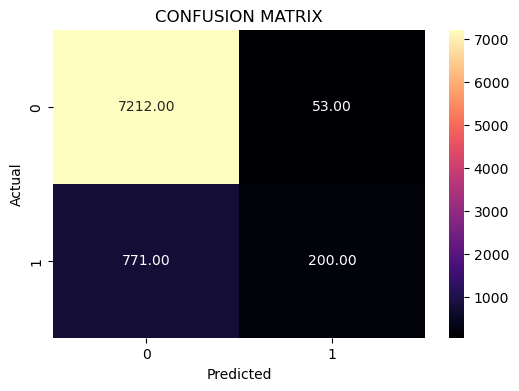

In [217]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_hp_rf),annot=True,cmap="magma",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# RANDOM FOREST BY APPLYING THE SMOTE:

In [218]:
rf_sm=RandomForestClassifier(n_estimators=100,random_state=42)

In [219]:
rf_sm.fit(x_smote,y_smote)

RandomForestClassifier(random_state=42)

In [220]:
y_pre_rf_sm=rf_sm.predict(x_test)

In [221]:
print("ACCURACY SCORE :   ",accuracy_score(y_test,y_pre_rf_sm)*100)
print("\n\n")
print("F1 SCORE :   ",f1_score(y_test,y_pre_rf_sm)*100)
print("\n\n")
print(classification_report(y_test,y_pre_rf_sm))
pd.crosstab(y_test,y_pre_rf_sm)

ACCURACY SCORE OF DT:    90.04371053909665



F1 SCORE OF DT:    61.21097445600757



              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7265
           1       0.57      0.67      0.61       971

    accuracy                           0.90      8236
   macro avg       0.76      0.80      0.78      8236
weighted avg       0.91      0.90      0.90      8236



col_0,0,1
y,,
0,6769,496
1,324,647


Text(0.5, 1.0, 'CONFUSION MATRIX')

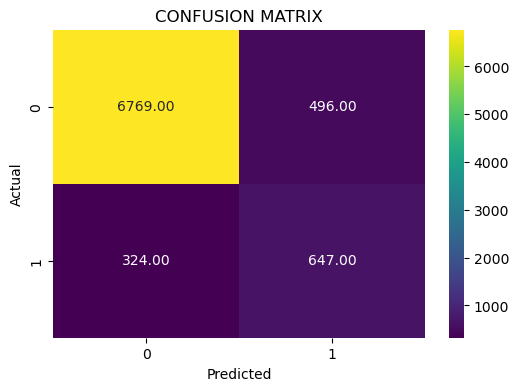

In [222]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_rf_sm),annot=True,cmap="viridis",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# HYPERPARAMETER ON RANDOM FOREST BY APPLYING THE SMOTE:

In [223]:
#k_rf_sm=range(2,6)
#cv_score_rf_sm=[]
#for i  in k_rf_sm:
  #  score_rf_sm=cross_val_score(RandomForestClassifier(random_state=42),x_smote,y_smote,cv=i,scoring="f1")
  #  cv_score_rf_sm.append(score_rf_sm.mean())
   # print(i,score_rf_sm.mean(),score_rf_sm.std())
#best_k_rf_sm=k_rf_sm[cv_score_rf_sm.index(max(cv_score_rf_sm))]
#print("The best cross_validation ",best_k_rf_sm)

In [224]:
param_rf_sm={
    "n_estimators":[x for x in np.arange(100,501,100)],
    "max_depth":(list(range(1,6))),
    "min_samples_split":(list(range(1,6))),
    "min_samples_leaf":(list(range(1,6))),
    "max_features":['sqrt','log2']
}

In [225]:
from sklearn.model_selection import GridSearchCV

In [226]:
#grid_rf_sm=GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_rf_sm,cv=5,verbose=3,n_jobs=-1,scoring="f1")

In [227]:
#grid_rf_sm.fit(x_smote,y_smote)

In [228]:
#print("best_params_:",grid_rf_sm.best_params_) 
#print("best_estimator:",grid_rf_sm.best_estimator_) 
#print("best_score:",grid_rf_sm.best_score_)

In [229]:
from sklearn.ensemble import RandomForestClassifier
hp_rf_sm= RandomForestClassifier(max_depth=5, random_state=42)

In [230]:
hp_rf_sm.fit(x_smote,y_smote)

RandomForestClassifier(max_depth=5, random_state=42)

In [231]:
y_pre_hp_rf_sm=hp_rf_sm.predict(x_test)

In [232]:
print("ACCURACY SCORE:   ",accuracy_score(y_test,y_pre_hp_rf_sm)*100)
print("\n\n")
print("F1 SCORE:   ",f1_score(y_test,y_pre_hp_rf_sm)*100)
print("\n\n")
print(classification_report(y_test,y_pre_hp_rf_sm))
pd.crosstab(y_test,y_pre_hp_rf_sm)

ACCURACY SCORE OF DT:    85.12627489072365



F1 SCORE OF DT:    58.033573141486805



              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7265
           1       0.43      0.87      0.58       971

    accuracy                           0.85      8236
   macro avg       0.71      0.86      0.74      8236
weighted avg       0.92      0.85      0.87      8236



col_0,0,1
y,,
0,6164,1101
1,124,847


Text(0.5, 1.0, 'CONFUSION MATRIX')

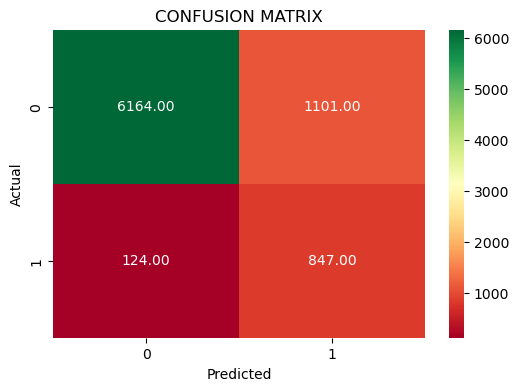

In [233]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_hp_rf_sm),annot=True,cmap="RdYlGn",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# GRADIENT BOOSTING ALGORITHMS:

In [234]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV

In [235]:
gb=GradientBoostingClassifier(random_state=42)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [236]:
y_pre_gb=gb.predict(x_test)

In [237]:
print("ACCURACY SCORE :   ",accuracy_score(y_test,y_pre_gb)*100)
print("\n\n")
print("F1 SCORE :   ",f1_score(y_test,y_pre_gb)*100)
print("\n\n")
print(classification_report(y_test,y_pre_gb))
pd.crosstab(y_test,y_pre_gb)

ACCURACY SCORE OF DT:    91.2821758135017



F1 SCORE OF DT:    57.15990453460621



              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.68      0.49      0.57       971

    accuracy                           0.91      8236
   macro avg       0.81      0.73      0.76      8236
weighted avg       0.90      0.91      0.91      8236



col_0,0,1
y,,
0,7039,226
1,492,479


Text(0.5, 1.0, 'CONFUSION MATRIX')

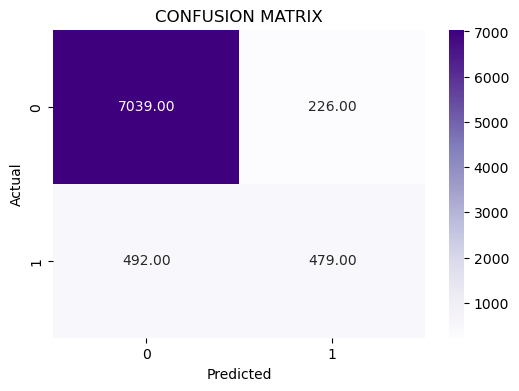

In [251]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_gb),annot=True,cmap="Purples",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# GRADIENT BOOSTING  WITH SMOTE:

In [247]:
gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

GradientBoostingClassifier(random_state=42)

In [248]:
y_pre_gb_sm=gb_sm.predict(x_test)

In [265]:
print("ACCURACY SCORE:   ",accuracy_score(y_test,y_pre_gb_sm)*100)
print("\n\n")
print("F1 SCORE:   ",f1_score(y_test,y_pre_gb_sm)*100)
print("\n\n")
print(classification_report(y_test,y_pre_gb_sm))
pd.crosstab(y_test,y_pre_gb_sm)

ACCURACY SCORE:    88.61097620203982



F1 SCORE:    62.0242914979757



              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7265
           1       0.51      0.79      0.62       971

    accuracy                           0.89      8236
   macro avg       0.74      0.84      0.78      8236
weighted avg       0.92      0.89      0.90      8236



col_0,0,1
y,,
0,6532,733
1,205,766


Text(0.5, 1.0, 'CONFUSION MATRIX')

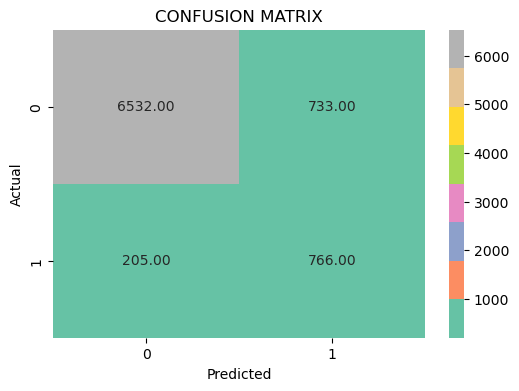

In [258]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_gb_sm),annot=True,cmap="Set2",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# XTREME GRADIENT BOOSTING :

In [260]:
from xgboost import XGBClassifier

In [261]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [262]:
y_pre_xgb=xgb.predict(x_test)

In [264]:
print("ACCURACY SCORE :   ",accuracy_score(y_test,y_pre_xgb)*100)
print("\n\n")
print("F1 SCORE:   ",f1_score(y_test,y_pre_xgb)*100)
print("\n\n")
print(classification_report(y_test,y_pre_xgb))
pd.crosstab(y_test,y_pre_xgb)

ACCURACY SCORE :    91.07576493443419



F1 SCORE:    57.24258289703316



              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7265
           1       0.66      0.51      0.57       971

    accuracy                           0.91      8236
   macro avg       0.80      0.74      0.76      8236
weighted avg       0.90      0.91      0.91      8236



col_0,0,1
y,,
0,7009,256
1,479,492


Text(0.5, 1.0, 'CONFUSION MATRIX')

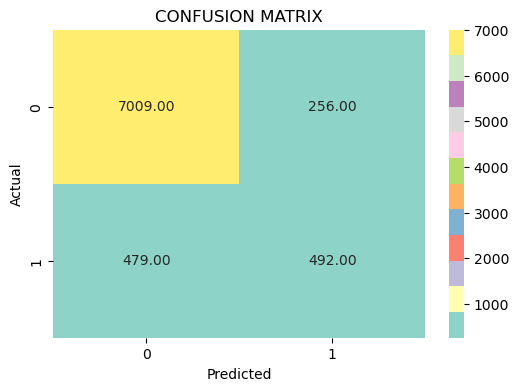

In [267]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_xgb),annot=True,cmap="Set3",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# XGRADIENT BOOSTING WITH SMOTE:

In [268]:
xgb_sm=XGBClassifier()
xgb_sm.fit(x_smote,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [269]:
y_pre_xgb_sm=xgb_sm.predict(x_test)

In [270]:
print("ACCURACY SCORE :   ",accuracy_score(y_test,y_pre_xgb_sm)*100)
print("\n\n")
print("F1 SCORE:   ",f1_score(y_test,y_pre_xgb_sm)*100)
print("\n\n")
print(classification_report(y_test,y_pre_xgb_sm))
pd.crosstab(y_test,y_pre_xgb_sm)

ACCURACY SCORE :    90.79650315687226



F1 SCORE:    59.594882729211086



              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7265
           1       0.62      0.58      0.60       971

    accuracy                           0.91      8236
   macro avg       0.78      0.76      0.77      8236
weighted avg       0.91      0.91      0.91      8236



col_0,0,1
y,,
0,6919,346
1,412,559


Text(0.5, 1.0, 'CONFUSION MATRIX')

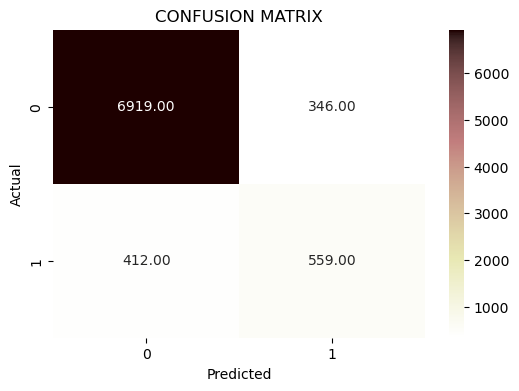

In [273]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pre_xgb_sm),annot=True,cmap="pink_r",fmt=".2f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX")

# ANN:

In [276]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 620.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.2 MB 5.3 MB/s eta 0:01:14
   ---------------------------------------- 0.3/390.2 MB 4.1 MB/s eta 0:01:36
   ---------------------------------------- 0.5/390.2 MB 3.9 MB/s eta 0:01:42
   ---------------------------------------- 0.7/390.2 MB 3.8 MB/s eta 0:01:44
   ---------------------------------------- 0.9/390.2 MB 3.9 MB/s eta 0:01:40
   ---------------------------------------- 1.1/390.2 MB 3.9 MB/s eta 0:01:41
   ---------------------------------------- 1.3/390.2 MB 4.2 MB/s eta 0:01:34
   ---------------------------------------- 1.5/390.2 MB 4.2 MB/s eta 0:01:33
   ---------------------------------------- 1.8/390.2 MB 4.4 MB/s eta 0:0

In [278]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [311]:
x_train.shape[1]

18

In [294]:
ann=Sequential()
ann.add(Dense(64,activation="relu",input_shape=(x_train.shape[1],)))
ann.add(Dropout(0.3))
ann.add(Dense(32,activation="relu"))
ann.add(Dropout(0.4))
ann.add(Dense(1,activation="sigmoid"))

In [295]:
ann.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [296]:
ann.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [302]:
score=ann.fit(x_train,y_train,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8895 - loss: 0.0000e+00 - val_accuracy: 0.8855 - val_loss: 0.0000e+00
Epoch 2/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8883 - loss: 0.0000e+00 - val_accuracy: 0.8855 - val_loss: 0.0000e+00
Epoch 3/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8931 - loss: 0.0000e+00 - val_accuracy: 0.8855 - val_loss: 0.0000e+00
Epoch 4/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8883 - loss: 0.0000e+00 - val_accuracy: 0.8855 - val_loss: 0.0000e+00
Epoch 5/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8903 - loss: 0.0000e+00 - val_accuracy: 0.8855 - val_loss: 0.0000e+00
Epoch 6/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8895 - loss: 0.0000e+00 - val_accuracy: 0.8855 - val_loss: 0.0000e+00
Epoch 7/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8890 - loss: 0.0000e+00 - val_accuracy: 0.8855 - val_loss: 0.0000e+00
Epoch 8/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/s

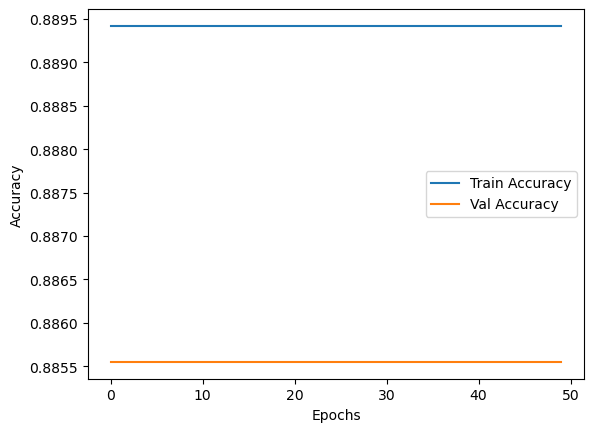

In [303]:
plt.plot(score.history['accuracy'], label='Train Accuracy')
plt.plot(score.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [318]:
loss_ann,accuracy_ann=ann.evaluate(x_test,y_test)

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8846 - loss: 0.0000e+00


In [319]:
print("Test Loss: ",loss_ann*100)
print("Test Accuracy: ",accuracy_ann*100) 

Test Loss:  0.0
Test Accuracy:  88.21029663085938


In [320]:
prediction=(ann.predict(x_test)>0.5).astype("int32")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [321]:
print("Predictions:\n", prediction[:10])
print("Actual:\n", y_test[:10].values)

Predictions:
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Actual:
 [1 0 1 0 0 0 0 0 0 0]


# CONCLUSION:

In [322]:
LOG_REG=accuracy_score(y_test,y_pre_lr)*100
LOG_REG_SM=accuracy_score(y_test,y_pre_lr_sm)*100
SVM=accuracy_score(y_test,y_pre_svc)*100
SVM_HP=accuracy_score(y_test,y_pre_hp_svc)*100
SVM_SMOTE=accuracy_score(y_test,y_pre_svc_sm)*100
SVM_HP_SMOTE=accuracy_score(y_test,y_pre_hp_svc_sm)*100
DT=accuracy_score(y_test,y_pre_dt)*100
DT_HP=accuracy_score(y_test,y_pre_hp_dt)*100
DT_SMOTE=accuracy_score(y_test,y_pre_dt_sm)*100
DT_HP_SMOTE=accuracy_score(y_test,y_pre_hp_dt_sm)*100
RF=accuracy_score(y_test,y_pre_rf)*100
RF_HP=accuracy_score(y_test,y_pre_hp_rf)*100
RF_SMOTE=accuracy_score(y_test,y_pre_rf_sm)*100
RF_HP_SMOTE=accuracy_score(y_test,y_pre_hp_rf_sm)*100
GB=accuracy_score(y_test,y_pre_gb)*100
GB_SMOTE=accuracy_score(y_test,y_pre_gb_sm)*100
XGB=accuracy_score(y_test,y_pre_xgb)*100
XGB_SMOTE=accuracy_score(y_test,y_pre_xgb_sm)*100
ANN_ACCURACY=accuracy_ann*100

In [333]:
ACCURACY_SCORE=[LOG_REG,LOG_REG_SM,SVM,SVM_HP,SVM_SMOTE,SVM_HP_SMOTE,DT,DT_HP,DT_SMOTE,DT_HP_SMOTE,RF,RF_HP,RF_SMOTE,RF_HP_SMOTE,GB,GB_SMOTE,XGB,XGB_SMOTE,ANN_ACCURACY]

In [406]:
MODEL=['log_reg', 'log_reg_sm', 'sv', 'sv_hp', 'sv_sm', 'sv_hp_sm', 'dt', 'dt_hp', 'dt_smote', 'dt_hp_smote', 'rf', 'rf_hp', 'rf_smote', 'rf_hp_smote', 'gb', 'gb_smote', 'xgb', 'xgb_smote', 'ann']

In [408]:
col=['red','darkkhaki','yellow','blue','chartreuse',
 'orange','forestgreen','lightsteelblue','mediumvioletred','violet',
 'khaki','royalblue','brown','lightgray','lime',
 'cadetblue','deepskyblue','orange','pink']

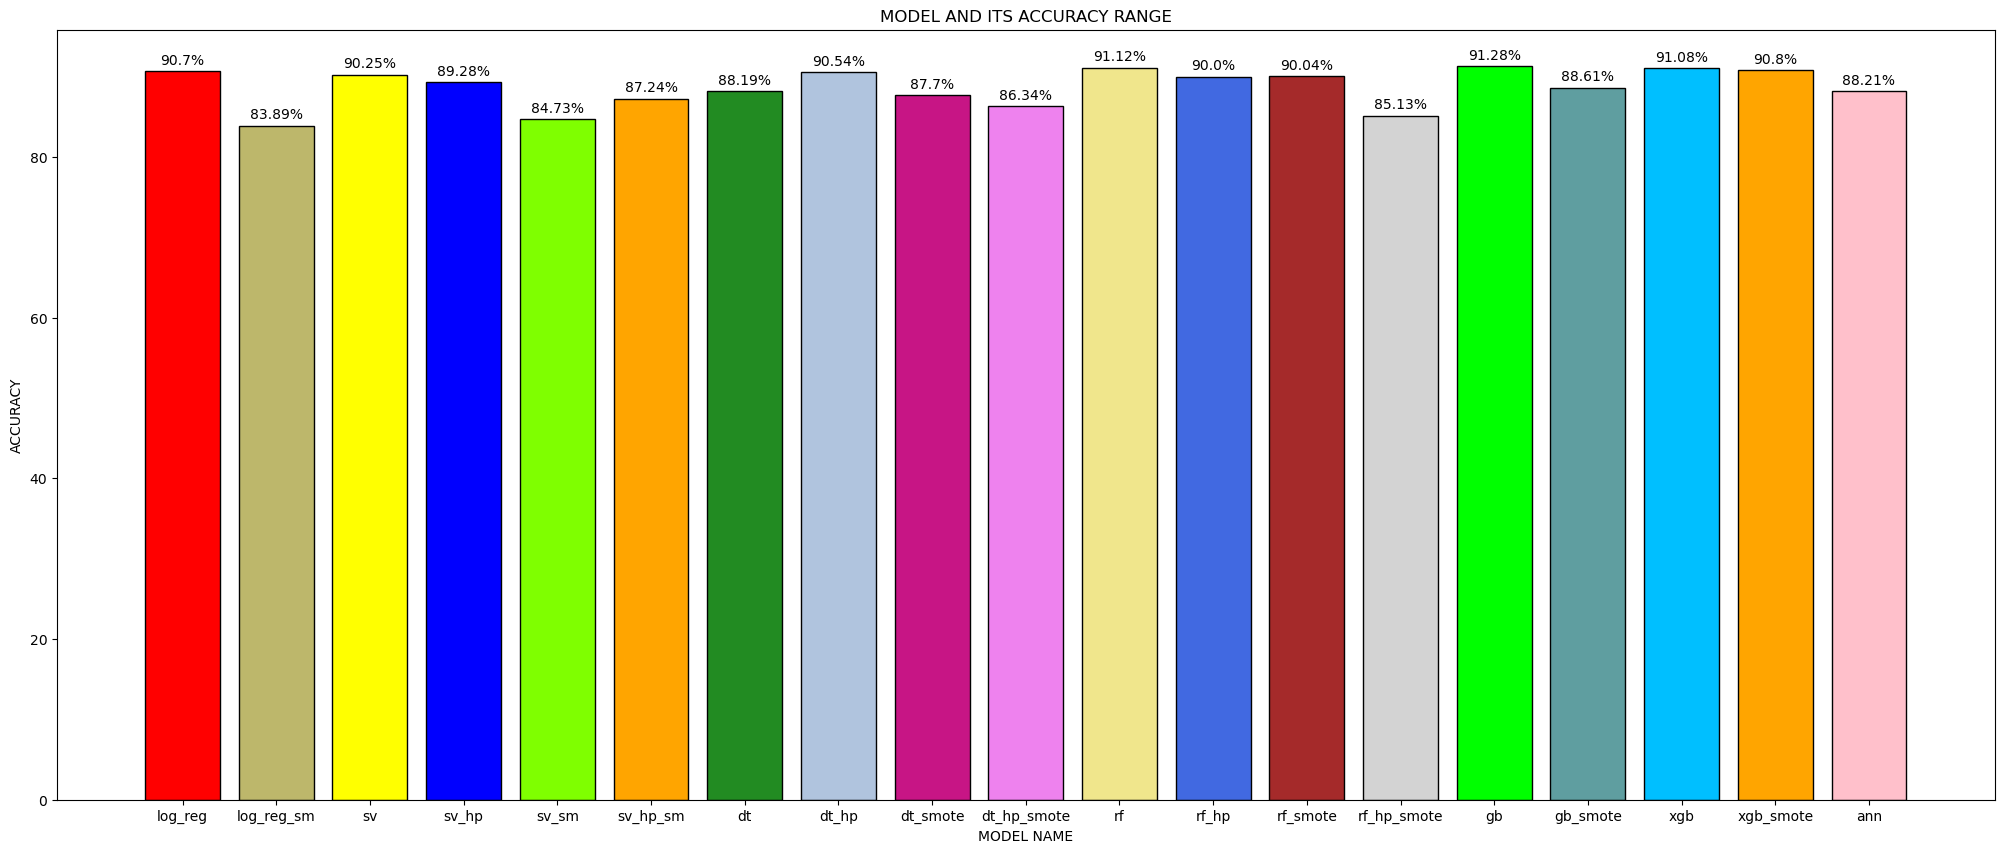

In [422]:
plt.figure(figsize=(25,10),facecolor="white")
plt.bar(MODEL,ACCURACY_SCORE,color=col,edgecolor="black")
plt.xlabel("MODEL NAME")
plt.ylabel("ACCURACY")
plt.title("MODEL AND ITS ACCURACY RANGE")
for b in range(len(ACCURACY_SCORE)):
    plt.text(b,ACCURACY_SCORE[b]+0.5,str(round(ACCURACY_SCORE[b],2))+"%",ha="center",va="bottom")
plt.show()

In [445]:
max_accuracy_indices = sorted(range(len(ACCURACY_SCORE)), key=lambda i: ACCURACY_SCORE[i], reverse=True)
for index in max_accuracy_indices[:10]:
    print("Model: ",MODEL[index],"-"+" Accuracy_score   ->",str(round(ACCURACY_SCORE[index],2))+"%")

Model:  gb - Accuracy_score   -> 91.28%
Model:  rf - Accuracy_score   -> 91.12%
Model:  xgb - Accuracy_score   -> 91.08%
Model:  xgb_smote - Accuracy_score   -> 90.8%
Model:  log_reg - Accuracy_score   -> 90.7%
Model:  dt_hp - Accuracy_score   -> 90.54%
Model:  sv - Accuracy_score   -> 90.25%
Model:  rf_smote - Accuracy_score   -> 90.04%
Model:  rf_hp - Accuracy_score   -> 90.0%
Model:  sv_hp - Accuracy_score   -> 89.28%


# <font color ="green">9 models</font> provides the <font color ="green">Accuracy score >=  90%</font>
# Out of all <font color ="green">Gradient Boosting Algorithm</font> has <font color ="green">more acccuracy score</font>  of <font color ="green">91.28%</font> .
# So we can use for <font color ="green">GRADIENT BOOSTING ALGORITHM</font> for the <font color ="blue">Portuguese Bank dataset</font> to achieve  to predict whether <font color ="red">a customer will subscribe to a term deposit </font>based on their demographic and interaction data from the phone call campaigns.